## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

In [1]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
!unzip /content/drive/MyDrive/images_NST/project_NST.zip

Archive:  /content/drive/MyDrive/images_NST/project_NST.zip
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 1a.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Task 2 : Loading VGG Pretrained Model

In [4]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained = True)
vgg

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [5]:
vgg = vgg.features
vgg

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [6]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [9]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size= 500):
  image = Image.open(img_path).convert('RGB')

  if max(image.size)  > max_size:
    size = max_size
  else :
    size = max(image.size)

  img_transforms = T.Compose([
      T.Resize(size),
      T.ToTensor(),                   ### Note: ToTensor tranform also do image tranpose
      T.Normalize(mean = [0.485, 0.456, 0.406],
                   std = [0.229, 0.224, 0.225])
  ])

  image = img_transforms(image)

  image = image.unsqueeze(0)

  return image

In [52]:
content_p = preprocess('/content/test3.jpg').to(device)
style_p = preprocess('/content/starry_night.jpg').to(device)
content_p.shape, style_p.shape

(torch.Size([1, 3, 500, 892]), torch.Size([1, 3, 500, 800]))

## Task 4 : Deprocess image

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):

  image = tensor.to('cpu').clone()

  image = image.numpy()
  image = image.squeeze(0)
  image = image.transpose(1,2,0) 
  image = image * np.array([0.229, 0.224, 0.225])+np.array([0.485, 0.456, 0.406])
  image = image.clip(0,1)

  return image

In [54]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

content_d.shape, style_d.shape

((500, 892, 3), (500, 800, 3))

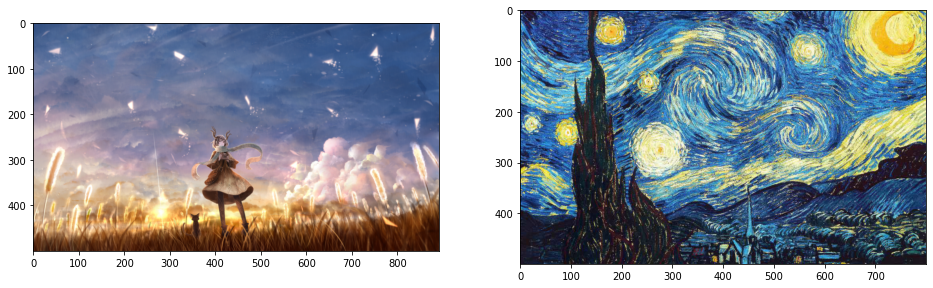

In [55]:
#Plotting

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [56]:
def get_features(image, model):

  layers = {
      '0' : 'conv1_1',
      '5' :'conv2_1',
      '10':'conv3_1',
      '19':'conv4_1',
      '21':'conv4_2',
      '28':'conv5_1'
  }
  x = image 
  
  Features = {}
  for name, layer in model._modules.items():
    x = layer(x)
    if name in layers:
      Features[layers[name]] = x
  return Features

In [57]:
''' Gram Metrix represents style of an image'''

def gram_metrix(tensor):

  b,c,h,w = tensor.size()
  tensor = tensor.view(c,h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [58]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

In [59]:
style_grams = {layer: gram_metrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [60]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return  loss

In [61]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [62]:
def style_loss(style_weights, target_features, style_grams):

  loss = 0

  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_metrix(target_f)
    style_gram = style_grams[layer]
    batch,channel,height,width = target_f.shape
    layer_loss = style_weights[layer]*torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(channel*height*width)

  return loss

In [63]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)
print("Content Loss: ", content_loss(target_f['conv4_2'], content_f['conv4_2']))
print("Style Loss: ", style_loss(style_weights, target_f, style_grams))


Content Loss:  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss:  tensor(3395.9915, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [64]:
from torch import optim

optimizer= optim.Adam([target], lr = 0.01)
alpha = 0.0000001
beta = 1e10

epochs = 50001
show_every = 5000

In [65]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return  loss

In [ ]:
results = []
for i in range(epochs):

  target_f = get_features(target, vgg)

  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)
  
  optimizer.zero_grad()

  t_loss.backward()

  optimizer.step()

  if i % show_every == 0:
    print(f' Total Loss at Epoch {i} : {t_loss}')
    results.append(deprocess(target.detach()))  

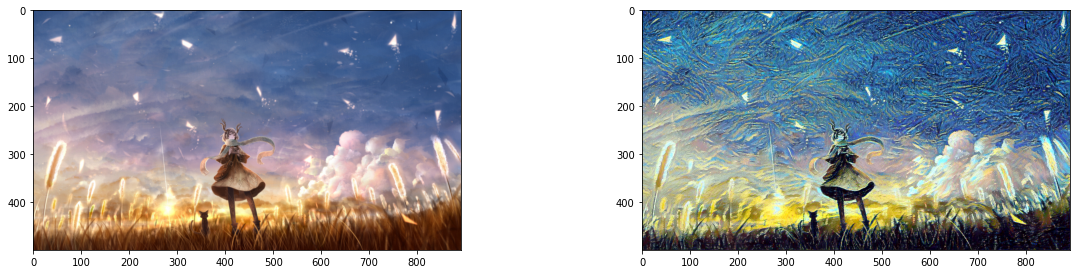

In [67]:
plt.figure(figsize = (20,15))
for i in range(len(results)):
  plt.subplot(3,2, i+1)
  plt.imshow(results[i])
plt.show()

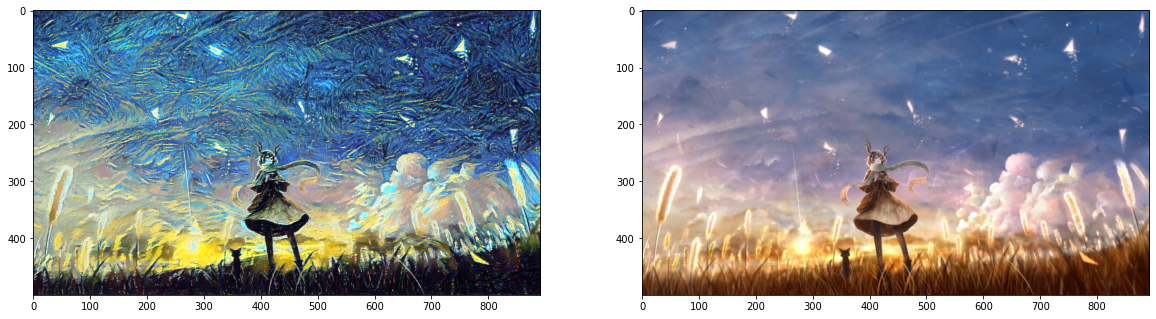

In [72]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
ax1.imshow(target_copy)
ax2.imshow(content_copy)

In [76]:
from google.colab import files
files.download( "saved_using_skimage2.jpg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
from skimage import io
io.imsave('saved_using_skimage2.jpg', target_copy.astype('float32'))